In [ ]:
# import zipfile

# def unzip_file(zip_filepath, extract_dir):
#   with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Vehicle_siren_sound/archive.zip'
# extract_directory = '/content/drive/MyDrive/Colab Notebooks/Vehicle_siren_sound/'

# unzip_file(zip_file_path, extract_directory)

In [ ]:
# import zipfile

# def unzip_file(zip_filepath, extract_dir):
#   with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Vehicle_siren_sound/emergency-vehicle-sirens-with-traffic-noise.zip'
# extract_directory = '/content/drive/MyDrive/Colab Notebooks/Vehicle_siren_sound/'

# unzip_file(zip_file_path, extract_directory)

In [ ]:
# ! pip install kaggle

In [ ]:
# # prompt: move  zip file to drive

# import shutil
# shutil.move('/content/emergency-vehicle-sirens-with-traffic-noise.zip', '/content/drive/MyDrive/Colab Notebooks/Vehicle_siren_sound')


In [ ]:
# # prompt: move all the file in folder to other folder

# import shutil
# import os

# source_folder = '/content/drive/MyDrive/Colab Notebooks/Vehicle_siren_sound/Dataset/Dataset/firetruck'
# destination_folder = '/content/drive/MyDrive/Colab Notebooks/Vehicle_siren_sound/sounds/firetruck'

# # Ensure the destination folder exists
# os.makedirs(destination_folder, exist_ok=True)

# for filename in os.listdir(source_folder):
#     source_path = os.path.join(source_folder, filename)
#     destination_path = os.path.join(destination_folder, filename)

#     try:
#         if os.path.isfile(source_path):
#             shutil.move(source_path, destination_path)
#             print(f"Moved '{filename}' to '{destination_folder}'")
#         else:
#             print(f"Skipping '{filename}' (not a file)")
#     except Exception as e:
#         print(f"Error moving '{filename}': {e}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall librosa -y  # Uninstall the current version
!pip install librosa==0.9.2 # Install version 0.9.2

Found existing installation: librosa 0.10.2.post1
Uninstalling librosa-0.10.2.post1:
  Successfully uninstalled librosa-0.10.2.post1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.3 MB/s eta 0:00:00


In [ ]:
#importing libraries
import os
import pickle
import librosa
import numpy as np
import librosa.display
import pandas as pd
import seaborn as sns
from scipy import signal
import IPython.display as ipd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# base_directory="/content/drive/MyDrive/sounds"
base_directory="/content/drive/MyDrive/Colab Notebooks/Vehicle_siren_sound/sounds"

In [ ]:

def display_audio_waveform(folder,file_name):
  file_path=os.path.join(base_directory,folder,file_name)
  try:
    data, sample_rate = librosa.load(file_path)
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(data, sr=sample_rate)
    plt.show()
    ipd.display(ipd.Audio(file_path))

  except FileNotFoundError:
    print(f"Error: File not found at path: {file_path}")
  except Exception as e:
    print(f"An error occurred: {e}")



In [ ]:
#evaluvate and explore dataset
folder = "ambulance"
file_name= "sound_1.wav"
display_audio_waveform(folder,file_name)

Error: File not found at path: /content/drive/MyDrive/sounds/ambulance/sound_1.wav


/usr/local/lib/python3.11/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [ ]:
#evaluvate and explore dataset
folder = "traffic"
file_name= "sound_401.wav"
display_audio_waveform(folder,file_name)

Error: File not found at path: /content/drive/MyDrive/sounds/traffic/sound_401.wav


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
#features_extractor to get a 80 MFCCs from each audio

def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [ ]:
audio_dataset_path = base_directory

extracted_features = []
for path in os.listdir(audio_dataset_path):
    for file in os.listdir(audio_dataset_path+"/"+path+"/"):
        if file.lower().endswith(".wav"):
            file_name = audio_dataset_path+"/"+path+"/"+file
            data = features_extractor(file_name)
            extracted_features.append([data, path])

In [ ]:
f = open('./Extracted_Features.pkl', 'wb')
pickle.dump(extracted_features, f)
f.close()

In [ ]:
f = open('./Extracted_Features.pkl', 'rb')
Data = pickle.load(f)
f.close()

In [ ]:
df = pd.DataFrame(Data,columns=['feature','class'])
df.head()

,feature,class
0,"[-529.2778, 96.09123, -46.660313, -12.780941, ...",ambulance
1,"[-118.98806, 113.261086, -38.593113, -1.789974...",ambulance
2,"[-164.77432, 126.585754, -35.331738, -14.7402,...",ambulance
3,"[-521.1548, 95.068886, -53.56713, -10.641551, ...",ambulance
4,"[-38.777115, 104.3772, -40.953793, 1.8485571, ...",ambulance


In [ ]:
df['class'].value_counts()

,count
class,
ambulance,600
firetruck,600
police,454
traffic,200


In [ ]:
X = np.array(df['feature'].tolist())
Y = np.array(df['class'].tolist())

In [ ]:
X.shape

(1854, 80)

In [ ]:
Y.shape

(1854,)

In [ ]:
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(Y))

In [ ]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(labelencoder, f)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)

In [ ]:
y_train.shape

(1483, 4)

# Train the model

In [ ]:
!pip install scikeras

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K
from sklearn import metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [ ]:
X_train_features  = X_train.reshape(len(X_train),-1,1)
X_test_features = X_test.reshape(len(X_test),-1,1)
print("Reshaped Array Size", X_train_features.shape)

Reshaped Array Size (1483, 80, 1)


In [ ]:
X_train.shape

(1483, 80)

In [ ]:
def cnn(optimizer="adam", activation="relu", dropout_rate=0.5):
    K.clear_session()
    inputs = Input(shape=(X_train_features.shape[1], X_train_features.shape[2]))

    #First Conv1D layer
    conv = Conv1D(3, 13, padding='same', activation=activation)(inputs)
    if dropout_rate != 0:
        conv = Dropout(dropout_rate)(conv)
    conv = MaxPooling1D(2)(conv)

    #Second Conv1D layer
    conv = Conv1D(16, 11, padding='same', activation=activation)(conv)
    if dropout_rate != 0:
        conv = Dropout(dropout_rate)(conv)
    conv = MaxPooling1D(2)(conv)

    #MaxPooling 1D
    conv = GlobalMaxPool1D()(conv)

    #Dense Layer
    conv = Dense(16, activation=activation)(conv)
    outputs = Dense(y_test.shape[1], activation='softmax')(conv)

    model = Model(inputs, outputs)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['acc'])
    return model

In [ ]:
model_cnn = cnn(optimizer="adam", activation="relu", dropout_rate=0)
model_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 80, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 80, 3)               │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 40, 3)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 40, 16)              │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 20, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 16)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 926 (3.62 KB)

 Trainable params: 926 (3.62 KB)

 Non-trainable params: 0 (0.00 B)

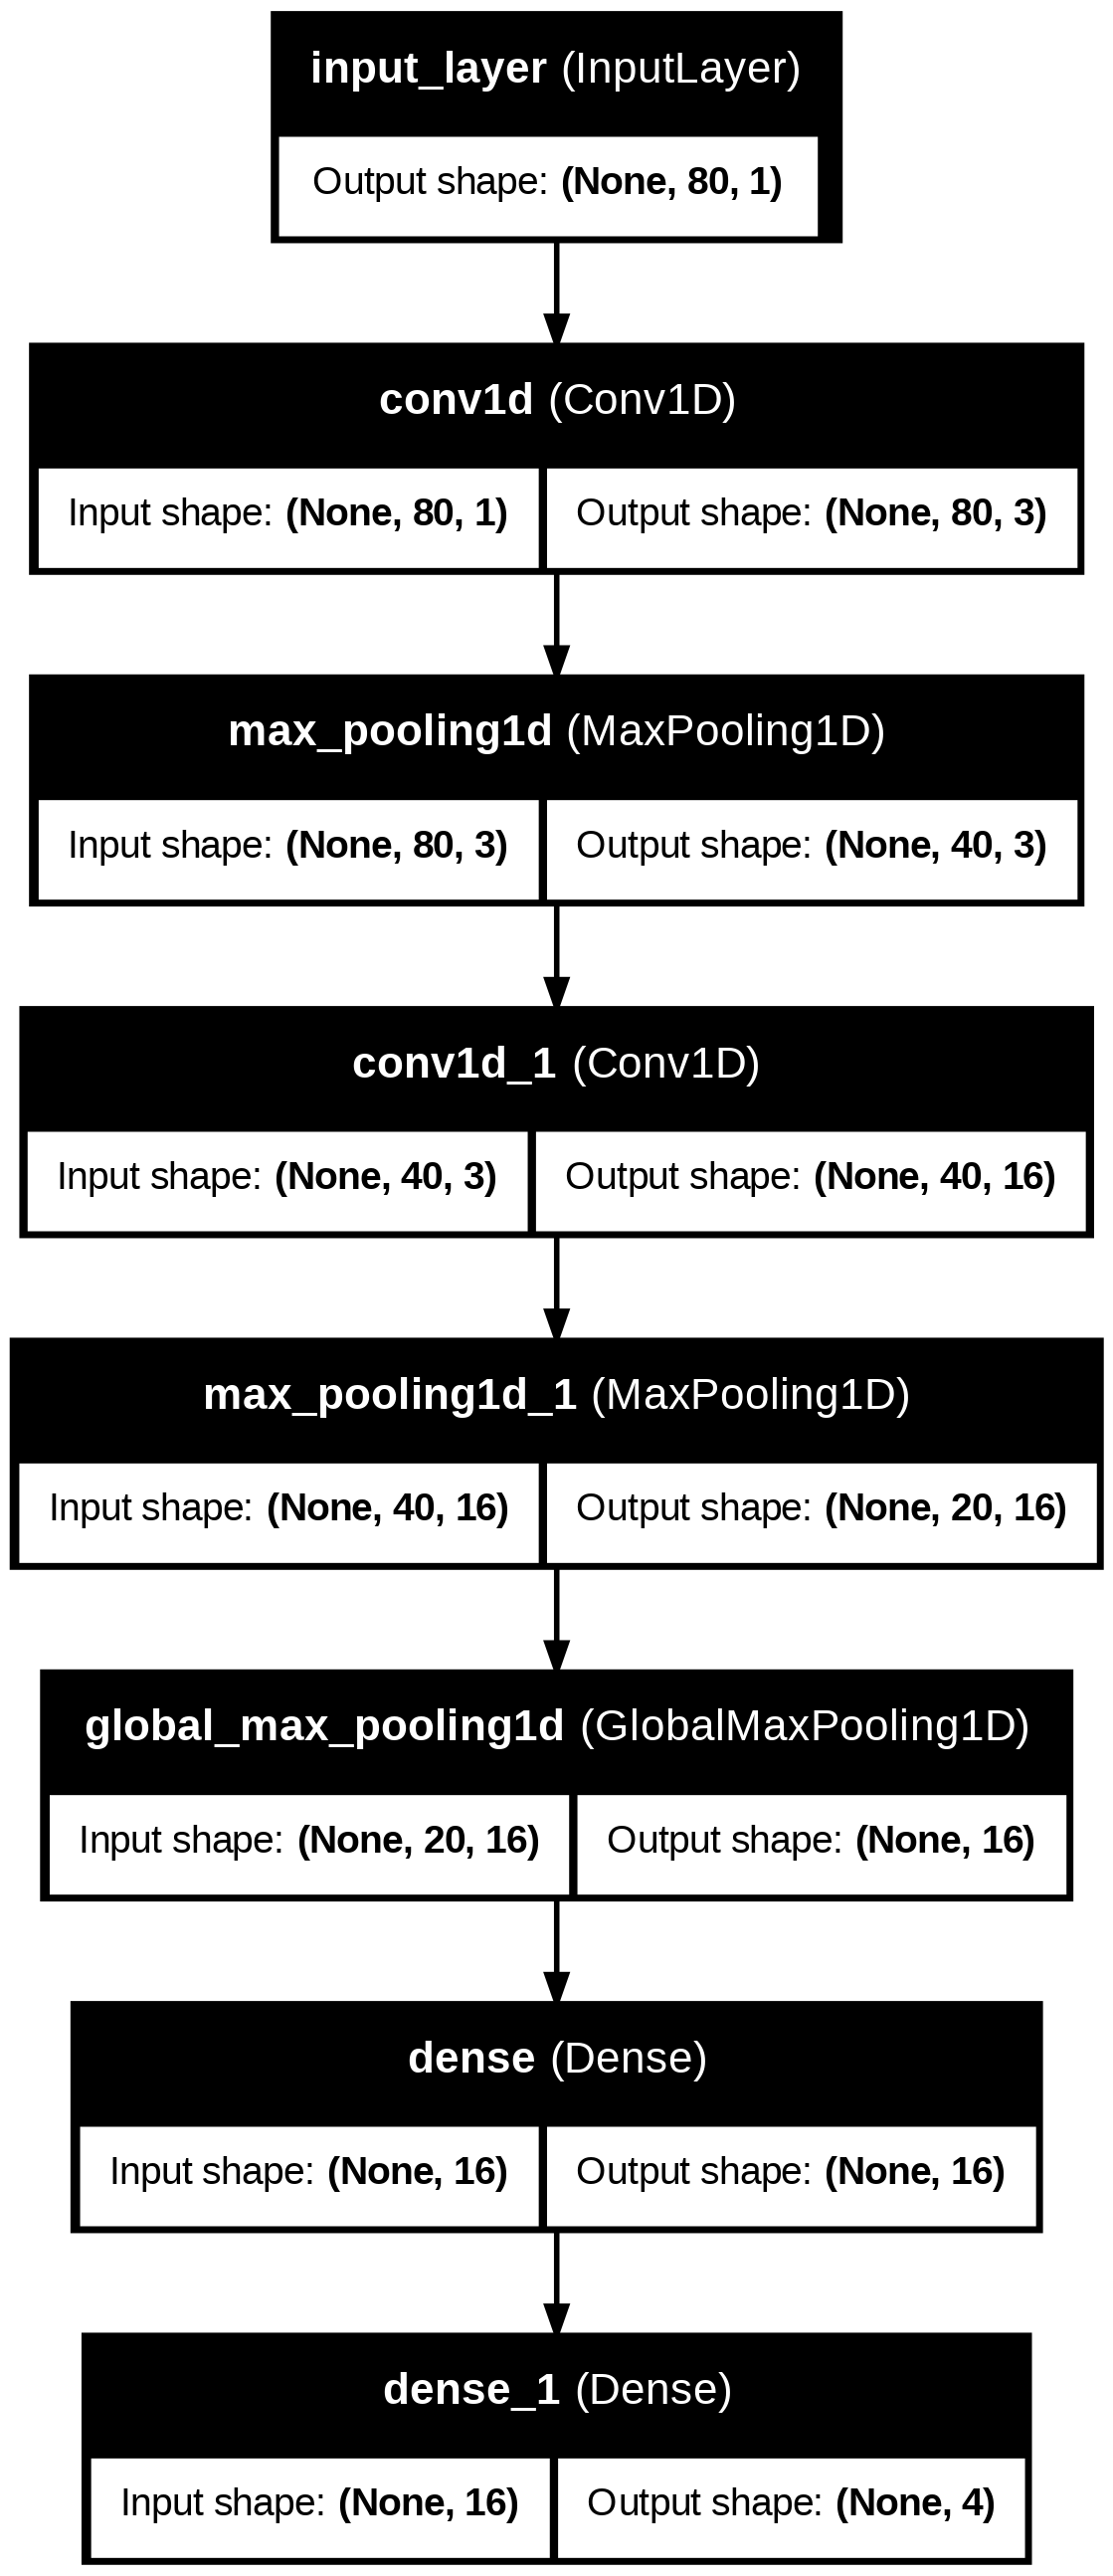

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_cnn, show_shapes=True, show_layer_names=True)

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode ='max',
                          patience = 10, restore_best_weights = True)

history = model_cnn.fit(X_train_features, y_train, epochs = 100,
                       callbacks = [early_stop],
                       batch_size = 64, validation_data = (X_test_features, y_test))

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - acc: 0.3225 - loss: 5.9785 - val_acc: 0.3235 - val_loss: 1.4356
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: acc,loss,val_acc,val_loss
  current = self.get_monitor_value(logs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.3266 - loss: 1.2140 - val_acc: 0.2480 - val_loss: 0.5969
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3327 - loss: 0.5463 - val_acc: 0.4825 - val_loss: 0.4644
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.4871 - loss: 0.4506 - val_acc: 0.5256 - val_loss: 0.4314
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.4927 - loss: 0.4368 - val_acc: 0.5553 - val_loss: 0.4136
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5835 - loss: 0.4022 - val_acc: 0.6280 - val_loss: 0.3969
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6131 - loss: 0.3865 - val_acc: 0.6146 - val_loss: 0.3876
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5936 - loss: 0.3865 - val_acc: 0.6523 - val_loss: 0.3768
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6207 - loss: 0.3775 - val_acc: 0.6550 - val_loss: 0.3666
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6680 - loss: 

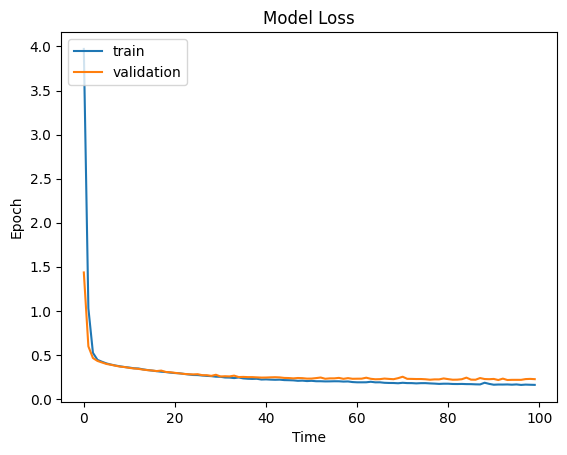

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Time')
plt.ylabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

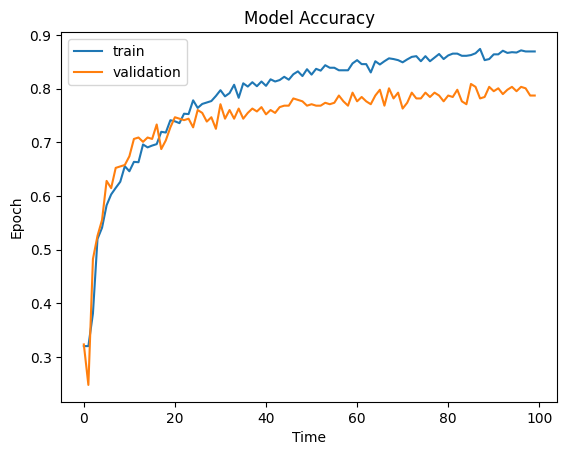

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Time')
plt.ylabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
_, acc = model_cnn.evaluate(X_test_features, y_test)
print("Test Accuracy : ", acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8005 - loss: 0.2181 
Test Accuracy :  0.7870619893074036


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


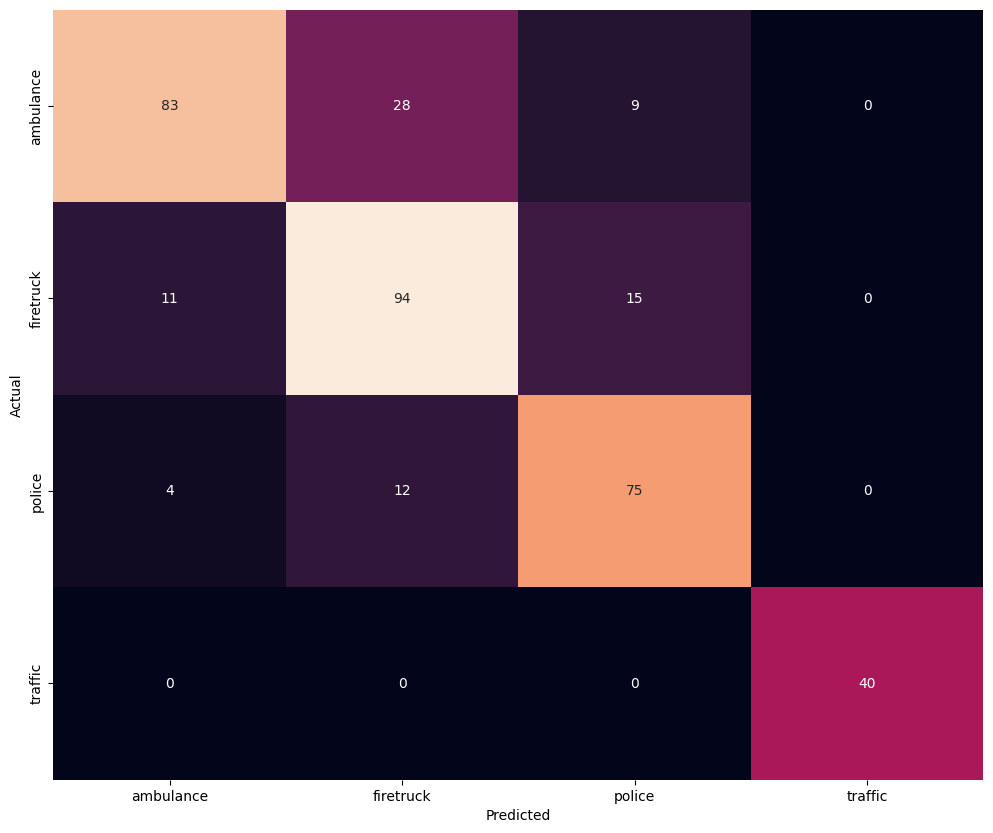

In [ ]:
y_pred = model_cnn.predict(X_test_features)

conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_, cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
model_cnn.save('cnn_model.h5')

In [ ]:
with open('label_encoder.pkl', 'rb') as f:
    loaded_label_encoder = pickle.load(f)

# Verify it works
print("Loaded classes:", loaded_label_encoder.classes_)

Loaded classes: ['ambulance' 'firetruck' 'police' 'traffic']


In [ ]:
# if you want model as function you can use this cell
from flask import Flask, request, jsonify
import numpy as np
import librosa
import pickle
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder


model = load_model('/content/cnn_model.h5')

with open('/content/label_encoder.pkl', 'rb') as f:
   label_encoder = pickle.load(f)

def features_extractor(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# file = request.files['file']

# if not file.filename.endswith('.wav'):
#     # return jsonify({'error': 'Unsupported file format. Please upload a .wav file'}), 400
#     print("Unsupported file format. Please upload a .wav file")

try:
    # Save the uploaded file
    file_path ="/content/drive/MyDrive/Colab Notebooks/Vehicle_siren_sound/sounds/traffic/sound_405.wav"

    # file.save(file_path)

    features = features_extractor(file_path)
    features = features.reshape(1, -1, 1)

    # Make prediction
    predictions = model.predict(features)
    predicted_class = np.argmax(predictions, axis=1)
    class_label = label_encoder.inverse_transform(predicted_class)
    print(class_label)
    # return jsonify({'predicted_class': class_label[0]}), 200
    # print("predicted_class:", class_label[0])

except Exception as e:
  print(e)
    # return jsonify({'error': str(e)}), 500

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
['traffic']


# LSTM model

In [ ]:
x_train_features  = X_train.reshape(len(X_train),-1, 80)
x_test_features = X_test.reshape(len(X_test), -1, 80)
print("Reshaped Array Size", x_train_features.shape)

Reshaped Array Size (1483, 1, 80)


In [ ]:
def lstm(x_tr):
    K.clear_session()
    inputs = Input(shape=(x_tr.shape[1], x_tr.shape[2]))
    #lstm
    x = LSTM(128)(inputs)
    x = Dropout(0.5)(x)
    #dense
    x = Dense(64, activation='relu')(x)
    x = Dense(y_test.shape[1], activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [ ]:
model_lstm = lstm(x_train_features)
model_lstm.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 80)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         107,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115,524 (451.27 KB)

 Trainable params: 115,524 (451.27 KB)

 Non-trainable params: 0 (0.00 B)

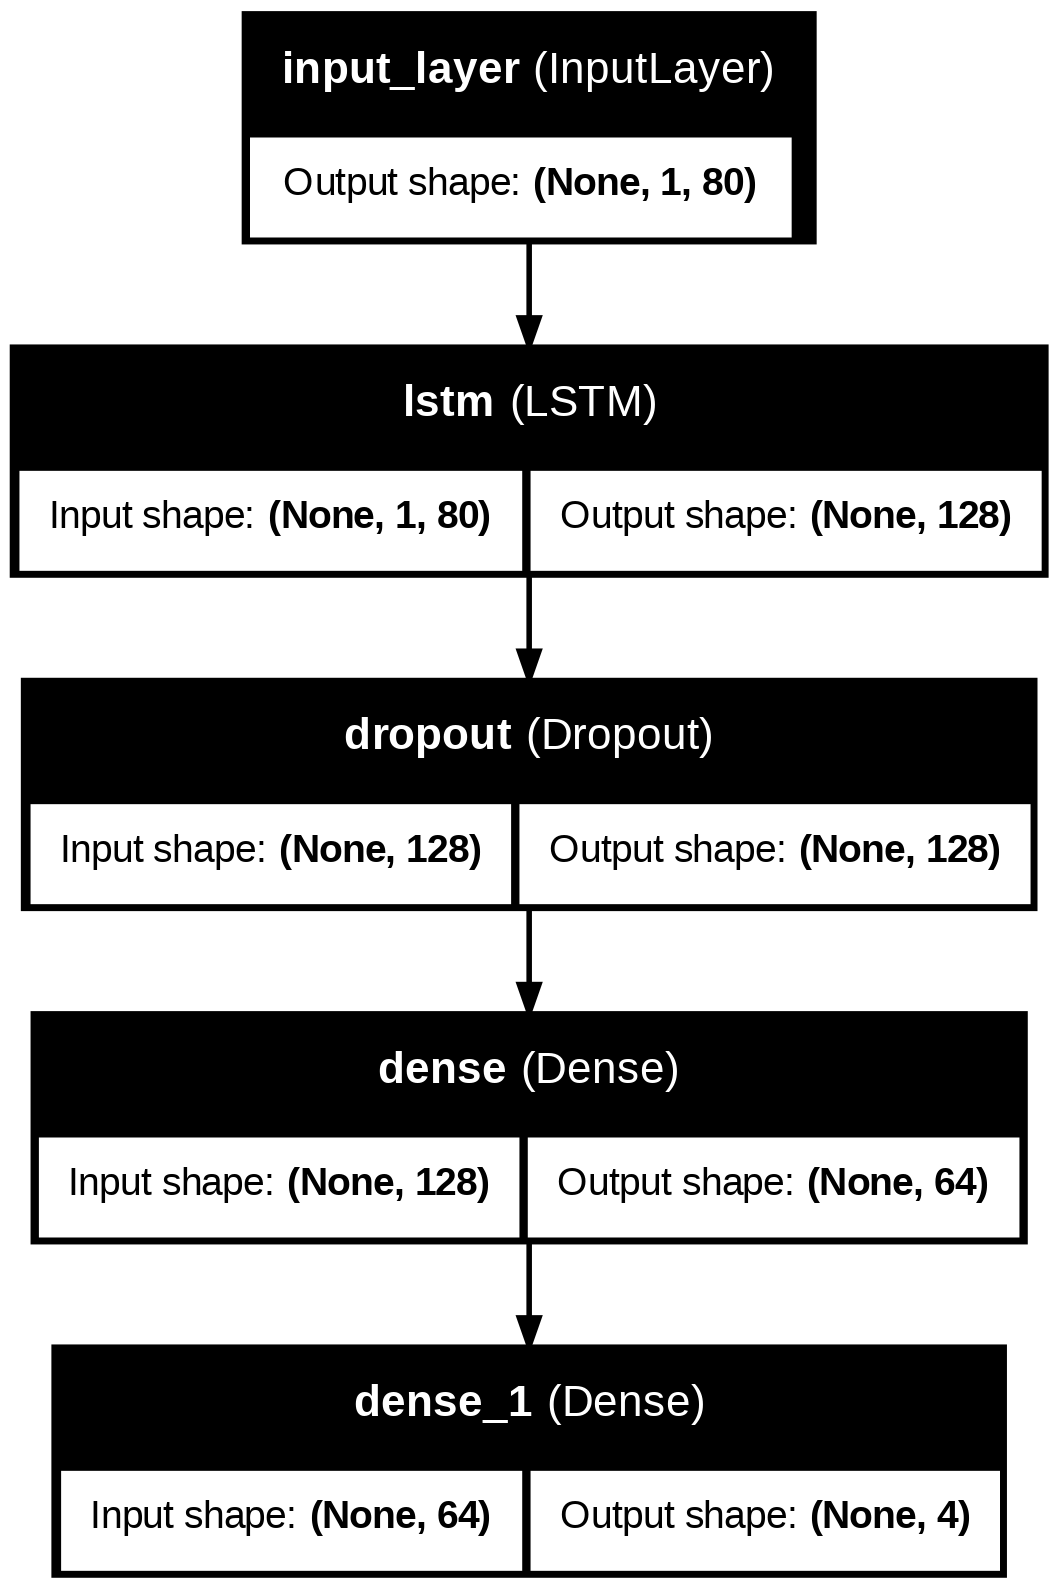

In [ ]:
plot_model(model_lstm, show_shapes=True, show_layer_names=True)

In [ ]:
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history = model_lstm.fit(x_train_features, y_train, epochs = 1000,
                        callbacks = [mc],
                        batch_size = 64, validation_data = (x_test_features, y_test))

Epoch 1/1000
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3738 - loss: 0.5933
Epoch 1: val_acc improved from -inf to 0.51482, saving model to best_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - acc: 0.3908 - loss: 0.5752 - val_acc: 0.5148 - val_loss: 0.4466
Epoch 2/1000
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5447 - loss: 0.4432
Epoch 2: val_acc improved from 0.51482 to 0.66307, saving model to best_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.5462 - loss: 0.4421 - val_acc: 0.6631 - val_loss: 0.3785
Epoch 3/1000
16/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5966 - loss: 0.3902
Epoch 3: val_acc improved from 0.66307 to 0.70620, saving model to best_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.6091 - loss: 0.3847 - val_acc: 0.7062 - val_loss: 0.3339
Epoch 4/1000
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.6766 - loss: 0.3412
Epoch 4: val_acc improved from 0.70620 to 0.75741, saving model to best_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━

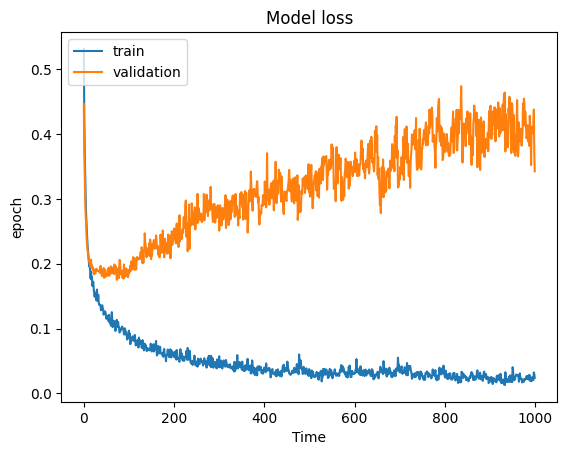

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Time')
plt.ylabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

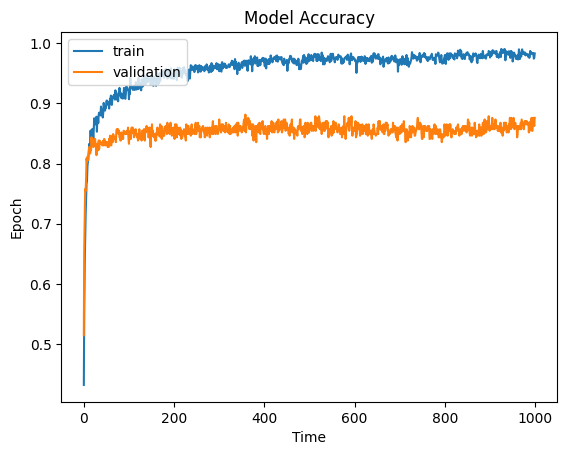

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Time')
plt.ylabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
_,acc = model_lstm.evaluate(x_test_features, y_test)
print("Accuracy:", acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8632 - loss: 0.4066 
Accuracy: 0.8760107755661011


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


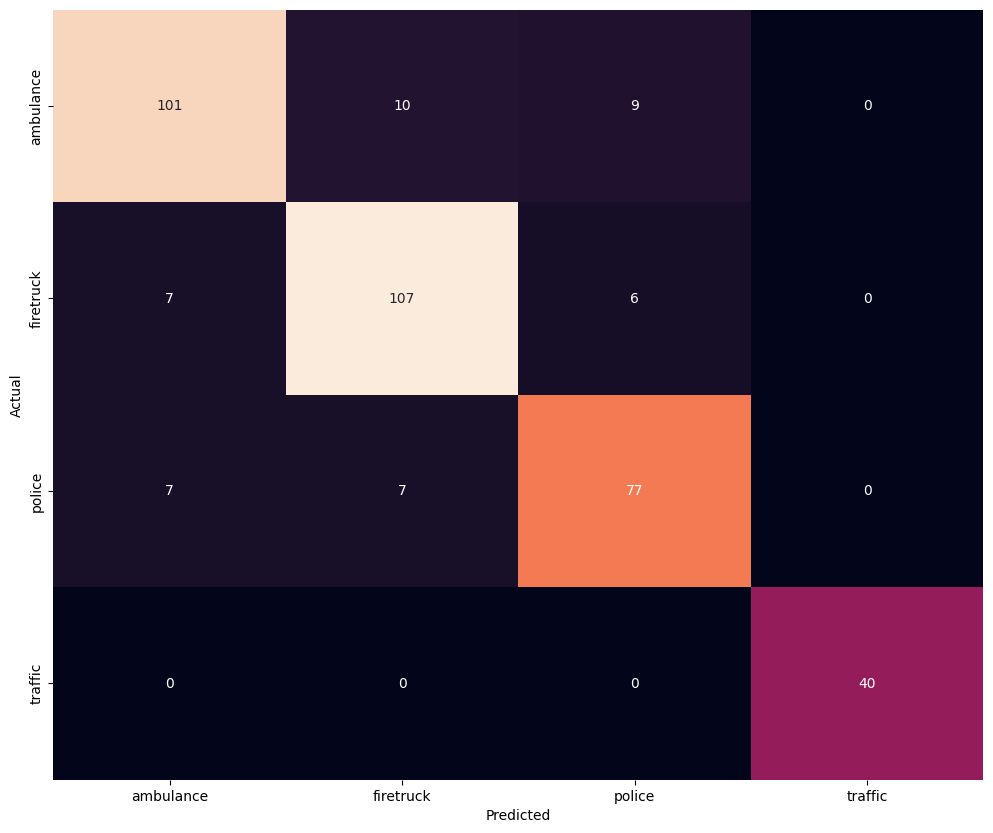

In [ ]:
y_pred = model_lstm.predict(x_test_features)

conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_, cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
model_lstm.save('lstm_model.h5')